#**Midterm Project**
##**2022-2023 NBA playres' data analysis: whether Embiid deserved the MVP honor?**
For the 2022-2023 NBA season, Joel Embiid was awarded the MVP. However, this selection was surrounded by controversy. This analysis will focus solely on the data to evaluate, from multiple perspectives, whether Embiid deserved the MVP honor.



##**First Part:** Getting Data
We extract data from BasketBallReference to fetch Joel Embiid's complete game log and per-game statistics for all NBA players in 2022-23 season


###Concept learned in class
pd.read_html() for web table data extraction

DataFrame creation and basic operations, Data cleaning, Data type conversion, Function definition, Time control)

##**we extract data from [BasketBall Reference](https://www.basketball-reference.com/players/e/embiijo01/gamelog/2023)**


In [64]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get Joel Embiid's 2022-23 season game-by-game data
def get_embiid_gamelog():
    """Fetch Joel Embiid's complete game log for the 2022-23 season"""
    url = "https://www.basketball-reference.com/players/e/embiijo01/gamelog/2023"

    # Add delay to avoid being blocked
    time.sleep(5)

    # Read all tables from the webpage
    all_tables = pd.read_html(url)

    # Game log data is at index 7
    embiid_df = all_tables[7]

    # Clean multi-level column headers
    if isinstance(embiid_df.columns, pd.MultiIndex):
        embiid_df.columns = embiid_df.columns.droplevel(0)

    # Remove header rows and empty rows
    embiid_df = embiid_df[embiid_df['Rk'] != 'Rk']
    embiid_df = embiid_df.dropna(subset=['Rk'])

    # Convert numeric columns to appropriate data types
    numeric_cols = ['Rk', 'G', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%',
                   'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc']

    for col in numeric_cols:
        if col in embiid_df.columns:
            embiid_df[col] = pd.to_numeric(embiid_df[col], errors='coerce')


    return embiid_df

# Get all players' per-game stats for 2022-23 season
def get_season_stats():
    """Fetch per-game statistics for all NBA players in 2022-23 season"""
    url = "https://www.basketball-reference.com/leagues/NBA_2023_per_game.html"

    # Add delay to avoid being blocked
    time.sleep(5)

    # Read all tables from the webpage
    all_tables = pd.read_html(url)

    # Player stats table is the first one
    season_df = all_tables[0]

    # Clean multi-level column headers
    if isinstance(season_df.columns, pd.MultiIndex):
        season_df.columns = season_df.columns.droplevel(0)

    # Remove header rows and empty rows
    season_df = season_df[season_df['Player'] != 'Player']
    season_df = season_df.dropna(subset=['Player'])

    # Convert numeric columns to appropriate data types
    numeric_cols = ['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
                   'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

    for col in numeric_cols:
        if col in season_df.columns:
            season_df[col] = pd.to_numeric(season_df[col], errors='coerce')

    return season_df


embiid_gamelog = get_embiid_gamelog()
season_stats = get_season_stats()

# Display basic information about the datasets

print(f"Embiid Game Log: {embiid_gamelog.shape[0]} games, {embiid_gamelog.shape[1]} columns")
print(f"Season Stats: {season_stats.shape[0]} players, {season_stats.shape[1]} columns")

print(f"Embiid Data Sample:")
print(embiid_gamelog.head(3))

print(f"Season Stats Sample:")
print(season_stats.head(3))

Embiid Game Log: 82 games, 34 columns
Season Stats: 680 players, 31 columns
Embiid Data Sample:
   Rk Gcar Gtm        Date Team Unnamed: 5  Opp      Result GS     MP  ...  \
0   1  329   1  2022-10-18  PHI          @  BOS  L, 117-126  *  37:16  ...   
1   2  330   2  2022-10-20  PHI        NaN  MIL    L, 88-90  *  36:09  ...   
2   3  331   3  2022-10-22  PHI        NaN  SAS  L, 105-114  *  35:57  ...   

    DRB   TRB  AST  STL  BLK  TOV   PF   PTS  GmSc  +/-  
0  14.0  15.0  5.0  0.0  1.0  6.0  4.0  26.0  17.7  -13  
1  11.0  12.0  3.0  0.0  1.0  4.0  2.0  15.0   4.3  -10  
2  10.0  13.0  3.0  1.0  2.0  2.0  2.0  40.0  33.7    6  

[3 rows x 34 columns]
Season Stats Sample:
    Rk          Player   Age Team Pos     G    GS    MP    FG   FGA  ...  ORB  \
0  1.0     Joel Embiid  28.0  PHI   C  66.0  66.0  34.6  11.0  20.1  ...  1.7   
1  2.0     Luka Dončić  23.0  DAL  PG  66.0  66.0  36.2  10.9  22.0  ...  0.8   
2  3.0  Damian Lillard  32.0  POR  PG  58.0  58.0  36.3   9.6  20.7  ...

##**Second Part:** Explore personal data


###Concept learned in class list:

**Python Fundamentals 1**

Basic Python syntax and data structures (lists, dictionaries)

Variable assignment and basic operations

Function calls and method usage

**Data Structures and Introduction to Pandas
Pandas DataFrame Operations:**

Creating DataFrames: pd.DataFrame()

Data aggregation: mean(), max(), sum()

Grouped statistics: groupby(), agg()

Data filtering and boolean indexing

Column operations and calculated columns

**Intro to pandas / Introduction to pandas
Advanced Pandas Features**

Data sorting: sort_values()

Resetting index: reset_index()

Rolling calculations: rolling()

Data binning: pd.cut()

String operations: str.contains()

Data type conversion: astype()

datetime, and matplotlib intro
Time Series Processing:

Date conversion: pd.to_datetime()

Time feature extraction: dt.month_name()

**Data Visualization:**

Basic Matplotlib plotting

Subplot creation: plt.subplots()

Multiple chart types: line plots, bar charts, histograms

Chart styling and customization

**More plotting with matplotlib and seaborn
Advanced Visualization:**

Seaborn heatmaps: sns.heatmap()

Complex layouts: plt.tight_layout()

Multi-subplot coordination

Color and style customization

###1. Basic Per Game Averages

In [65]:
# 1. Basic Per Game Averages (DataFrame format)
basic_avgs = pd.DataFrame({
    'Stat': ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks',
             'FG%', '3P%', 'FT%'],
    'Average': [
        embiid_gamelog['PTS'].mean(),
        embiid_gamelog['TRB'].mean(),
        embiid_gamelog['AST'].mean(),
        embiid_gamelog['STL'].mean(),
        embiid_gamelog['BLK'].mean(),
        embiid_gamelog['FG%'].mean(),
        embiid_gamelog['3P%'].mean(),
        embiid_gamelog['FT%'].mean()
    ]
})

print(basic_avgs.to_string(index=False, float_format='%.3f'))
"Basic Per Game Averages"

    Stat  Average
  Points   33.076
Rebounds   10.152
 Assists    4.152
  Steals    1.000
  Blocks    1.697
     FG%    0.549
     3P%    0.293
     FT%    0.854


'Basic Per Game Averages'

Joel Embiid has Strong per-game statistics

###2. Game Count Statistics (DataFrame format)

In [66]:
game_counts = pd.DataFrame({
    'Category': ['Total Games', 'Double-Doubles', '30+ Point Games', '40+ Point Games'],
    'Count': [
        len(embiid_gamelog),
        ((embiid_gamelog['PTS'] >= 10) & (embiid_gamelog['TRB'] >= 10)).sum(),
        (embiid_gamelog['PTS'] >= 30).sum(),
        (embiid_gamelog['PTS'] >= 40).sum()
    ]
})

print("Game Count Statistics")
print(game_counts.to_string(index=False))

Game Count Statistics
       Category  Count
    Total Games     82
 Double-Doubles     38
30+ Point Games     44
40+ Point Games     13


Joel Embiid has 50% to get 30 points a night, crazy performence.

### 3. Single Game Highs

In [67]:

single_highs = pd.DataFrame({
    'Stat': ['Points', 'Rebounds', 'Assists', 'Steals', 'Blocks'],
    'High': [
        embiid_gamelog['PTS'].max(),
        embiid_gamelog['TRB'].max(),
        embiid_gamelog['AST'].max(),
        embiid_gamelog['STL'].max(),
        embiid_gamelog['BLK'].max()
    ]
})

print("Single Game Highs")
print(single_highs.to_string(index=False))

Single Game Highs
    Stat  High
  Points  59.0
Rebounds  19.0
 Assists  10.0
  Steals   4.0
  Blocks   7.0


Great performance, has great ability to influence the game from all aspects.

### 4. Advanced Statistics
TS% (True Shooting Percentage): Measures scoring efficiency by accounting for 2-point, 3-point, and free throw attempts.

eFG% (Effective Field Goal Percentage): Adjusts FG% to reflect the extra value of 3-pointers compared to 2-pointers.

PTS_per_Shot: Calculates points scored per field goal attempt, showing shot selection efficiency.

In [83]:

embiid_gamelog['TS%'] = embiid_gamelog['PTS'] / (2 * (embiid_gamelog['FGA'] + 0.44 * embiid_gamelog['FTA']))
embiid_gamelog['eFG%'] = (embiid_gamelog['FG'] + 0.5 * embiid_gamelog['3P']) / embiid_gamelog['FGA']
embiid_gamelog['PTS_per_Shot'] = embiid_gamelog['PTS'] / embiid_gamelog['FGA']
embiid_gamelog['AST_TOV_Ratio'] = embiid_gamelog['AST'] / embiid_gamelog['TOV']
embiid_gamelog['Usage_Rate_Est'] = (embiid_gamelog['FGA'] + 0.44 * embiid_gamelog['FTA'] + embiid_gamelog['TOV']) * 40 / 34

advanced_stats = pd.DataFrame({
    'Stat': ['TS%', 'eFG%', 'PTS_per_Shot','AST_TOV_Ratio','Usage_Rate_Est'],
    'Value': [
        embiid_gamelog['TS%'].mean(),
        embiid_gamelog['eFG%'].mean(),
        embiid_gamelog['PTS_per_Shot'].mean(),
        embiid_gamelog['AST_TOV_Ratio'].mean(),
        embiid_gamelog['Usage_Rate_Est'].mean()
    ]
})

print("Advanced Statistics")
print(advanced_stats.to_string(index=False, float_format='%.3f'))

Advanced Statistics
          Stat  Value
           TS%  0.656
          eFG%  0.573
  PTS_per_Shot  1.660
 AST_TOV_Ratio  1.752
Usage_Rate_Est 33.748


Amazing ability to get points.

###5. Monthly Performance Trend Analysis
This code analyzes Embiid's performance variations across different months of the season, revealing his form fluctuations and seasonal consistency.

In [85]:
# Extract month and analyze monthly performance trends
embiid_gamelog['Date'] = pd.to_datetime(embiid_gamelog['Date'])
embiid_gamelog['Month'] = embiid_gamelog['Date'].dt.month_name()

monthly_stats = embiid_gamelog.groupby('Month').agg({
    'PTS': ['mean', 'std'],
    'TRB': 'mean',
    'AST': 'mean',
    'TS%': 'mean',
    'GmSc': 'mean',

}).round(2)

# Add game count per month
monthly_stats['Games_Played'] = embiid_gamelog.groupby('Month').size()

# Reorder months chronologically
month_order = ['October', 'November', 'December', 'January', 'February', 'March', 'April']
monthly_stats = monthly_stats.reindex(month_order)

print("MONTHLY PERFORMANCE ANALYSIS")
print(monthly_stats)

MONTHLY PERFORMANCE ANALYSIS
            PTS           TRB   AST   TS%   GmSc Games_Played
           mean    std   mean  mean  mean   mean             
Month                                                        
October   27.17   8.18   9.50  3.33  0.63  19.68            8
November  34.12  11.97   9.75  6.00  0.61  27.89           14
December  35.38   9.99   9.92  4.23  0.64  28.21           13
January   34.90   6.62  10.70  3.20  0.66  27.60           14
February  30.82   5.23  11.73  3.73  0.65  25.96           11
March     33.20   8.36   9.47  4.33  0.70  28.10           17
April     33.67  16.26   9.33  4.33  0.69  28.00            5


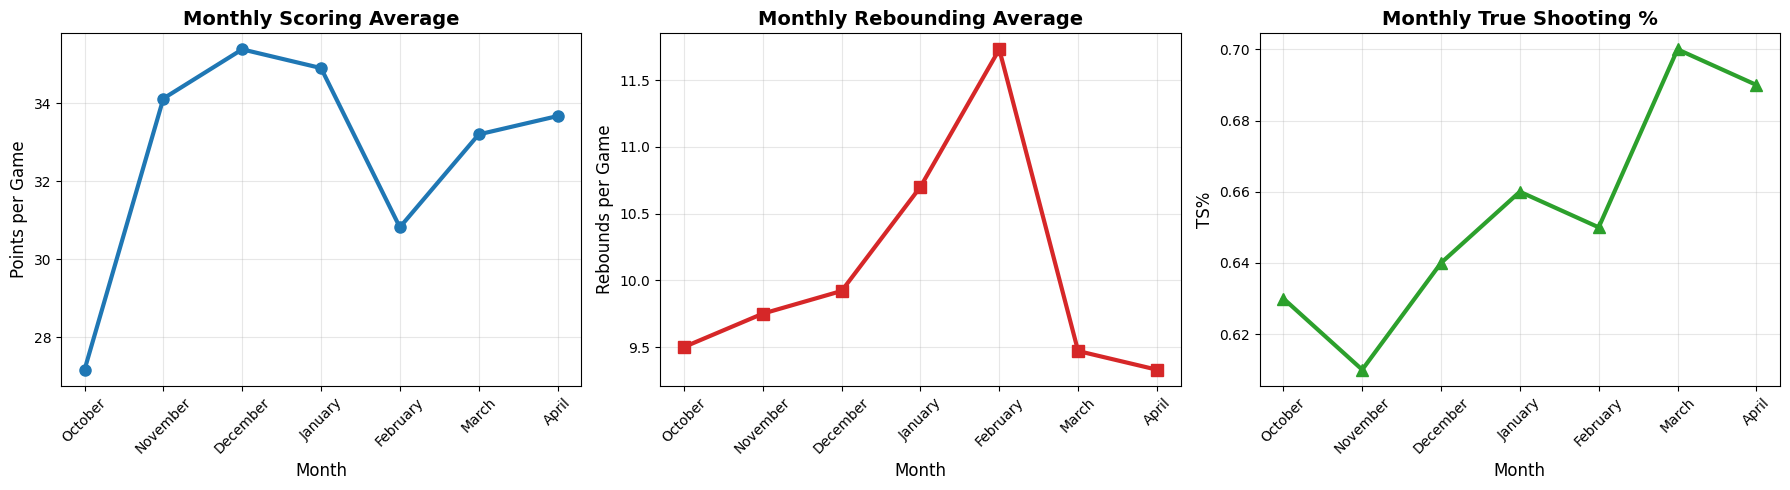

In [71]:
# Visualization: Three Separate Monthly Trend Charts
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Scoring trend
monthly_stats[('PTS', 'mean')].plot(kind='line', marker='o', ax=ax1, color='#1f77b4', linewidth=3, markersize=8)
ax1.set_title('Monthly Scoring Average', fontsize=14, fontweight='bold')
ax1.set_ylabel('Points per Game', fontsize=12)
ax1.set_xlabel('Month', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Rebounding trend
monthly_stats[('TRB', 'mean')].plot(kind='line', marker='s', ax=ax2, color='#d62728', linewidth=3, markersize=8)
ax2.set_title('Monthly Rebounding Average', fontsize=14, fontweight='bold')
ax2.set_ylabel('Rebounds per Game', fontsize=12)
ax2.set_xlabel('Month', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Efficiency trend
monthly_stats[('TS%', 'mean')].plot(kind='line', marker='^', ax=ax3, color='#2ca02c', linewidth=3, markersize=8)
ax3.set_title('Monthly True Shooting %', fontsize=14, fontweight='bold')
ax3.set_ylabel('TS%', fontsize=12)
ax3.set_xlabel('Month', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Conclusion**: Joel Embiid displayed impressive consistency and growth throughout the season. His True Shooting Percentage showed steady improvement, reflecting increasing efficiency. While scoring remained consistently high after October, February revealed his versatility - when scoring slightly decreased, he elevated his rebounding to maintain impact. This adaptability, combined with rising efficiency, demonstrates a complete MVP-caliber player who consistently contributes to winning basketball.



##5.(1) Closer look:Game-by-Game Performance Trends with 10-Game Rolling Averages
This analysis employs pandas' .rolling() method with a 10-game window to transform raw game-by-game data into smoothed performance trends. By calculating moving averages, we eliminate short-term statistical noise and reveal the underlying patterns of Embiid's performance consistency throughout the entire season, providing a clearer picture of his sustained dominance beyond single-game fluctuations.

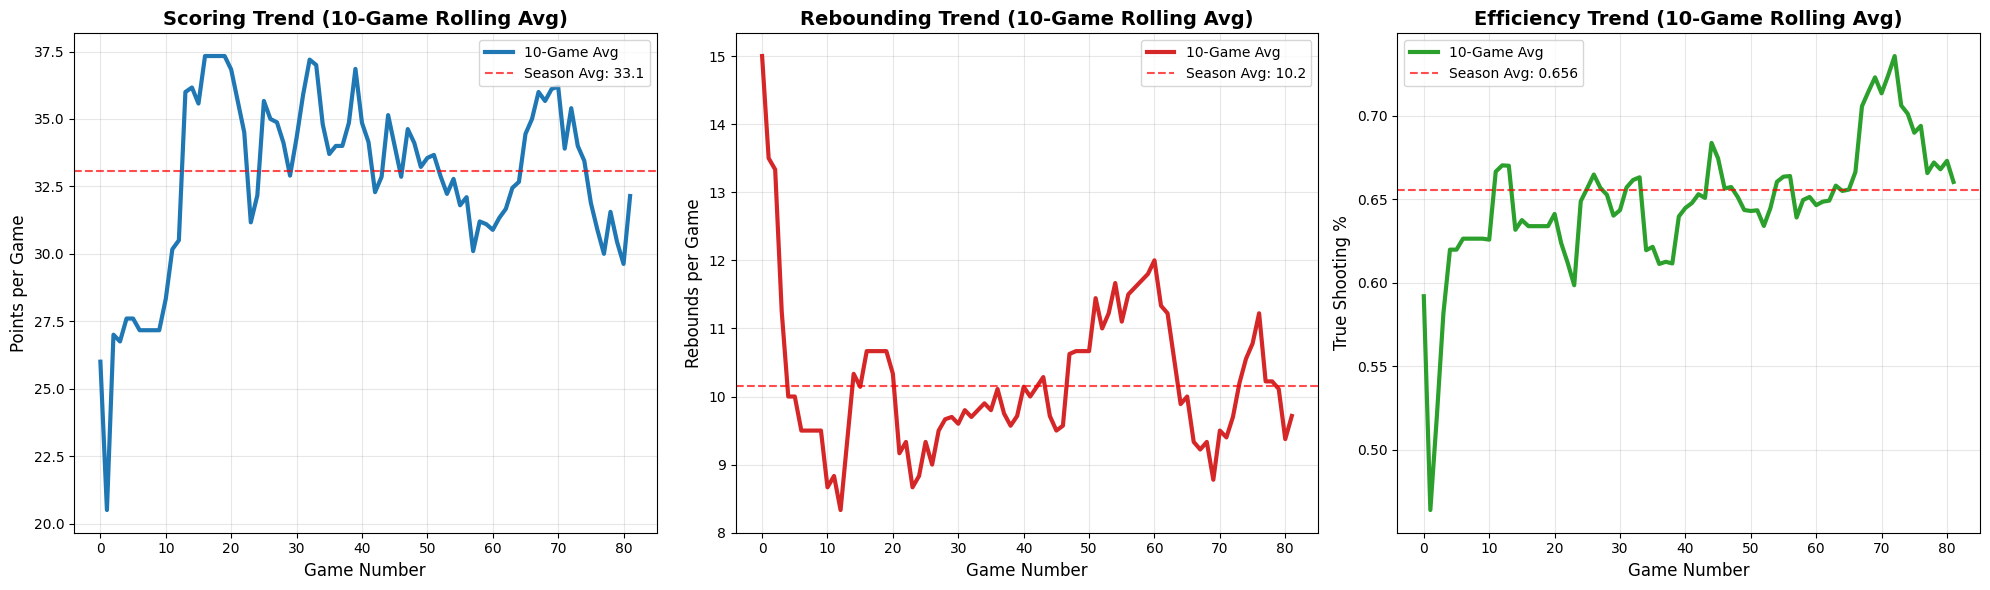

In [72]:
# Prepare game-by-game data for rolling analysis
embiid_gamelog_sorted = embiid_gamelog.sort_values('Date').reset_index(drop=True)

# Calculate 10-game rolling averages
embiid_gamelog_sorted['PTS_10game_avg'] = embiid_gamelog_sorted['PTS'].rolling(window=10, min_periods=1).mean()
embiid_gamelog_sorted['TRB_10game_avg'] = embiid_gamelog_sorted['TRB'].rolling(window=10, min_periods=1).mean()
embiid_gamelog_sorted['TS%_10game_avg'] = embiid_gamelog_sorted['TS%'].rolling(window=10, min_periods=1).mean()

# Visualization: 10-Game Rolling Average Trends
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Scoring trend (10-game avg)
ax1.plot(embiid_gamelog_sorted.index, embiid_gamelog_sorted['PTS_10game_avg'],
         linewidth=3, color='#1f77b4', label='10-Game Avg')
ax1.axhline(y=embiid_gamelog_sorted['PTS'].mean(), color='red', linestyle='--',
            alpha=0.7, label=f'Season Avg: {embiid_gamelog_sorted["PTS"].mean():.1f}')
ax1.set_title('Scoring Trend (10-Game Rolling Avg)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Points per Game', fontsize=12)
ax1.set_xlabel('Game Number', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: Rebounding trend (10-game avg)
ax2.plot(embiid_gamelog_sorted.index, embiid_gamelog_sorted['TRB_10game_avg'],
         linewidth=3, color='#d62728', label='10-Game Avg')
ax2.axhline(y=embiid_gamelog_sorted['TRB'].mean(), color='red', linestyle='--',
            alpha=0.7, label=f'Season Avg: {embiid_gamelog_sorted["TRB"].mean():.1f}')
ax2.set_title('Rebounding Trend (10-Game Rolling Avg)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Rebounds per Game', fontsize=12)
ax2.set_xlabel('Game Number', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: Efficiency trend (10-game avg)
ax3.plot(embiid_gamelog_sorted.index, embiid_gamelog_sorted['TS%_10game_avg'],
         linewidth=3, color='#2ca02c', label='10-Game Avg')
ax3.axhline(y=embiid_gamelog_sorted['TS%'].mean(), color='red', linestyle='--',
            alpha=0.7, label=f'Season Avg: {embiid_gamelog_sorted["TS%"].mean():.3f}')
ax3.set_title('Efficiency Trend (10-Game Rolling Avg)', fontsize=14, fontweight='bold')
ax3.set_ylabel('True Shooting %', fontsize=12)
ax3.set_xlabel('Game Number', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

##6. Game Impact Analysis
Analyzes the difference in Embiid's performance based on game outcomes, evaluating his actual impact on winning and losing.

In [73]:

# Analyze performance impact on game outcomes
embiid_gamelog['Win'] = embiid_gamelog['Result'].str.contains('W')

# Use only existing columns for win-loss comparison
available_stats = {}
for col in ['PTS', 'TRB', 'AST', 'TS%', 'GmSc', 'TOV', 'PF']:
    if col in embiid_gamelog.columns:
        if col == 'PTS':
            available_stats[col] = ['mean', 'count']
        else:
            available_stats[col] = 'mean'

win_loss_comparison = embiid_gamelog.groupby('Win').agg(available_stats).round(2)

print("PERFORMANCE IMPACT: WINS VS LOSSES")
win_loss_comparison

PERFORMANCE IMPACT: WINS VS LOSSES


PTS          TRB   AST   TS%   GmSc   TOV    PF
        mean count   mean  mean  mean   mean  mean  mean
Win                                                     
False  31.74    23  10.13  3.65  0.62  24.11  3.78  3.39
True   33.79    43  10.16  4.42  0.67  28.38  3.23  2.95

<Figure size 1000x600 with 0 Axes>

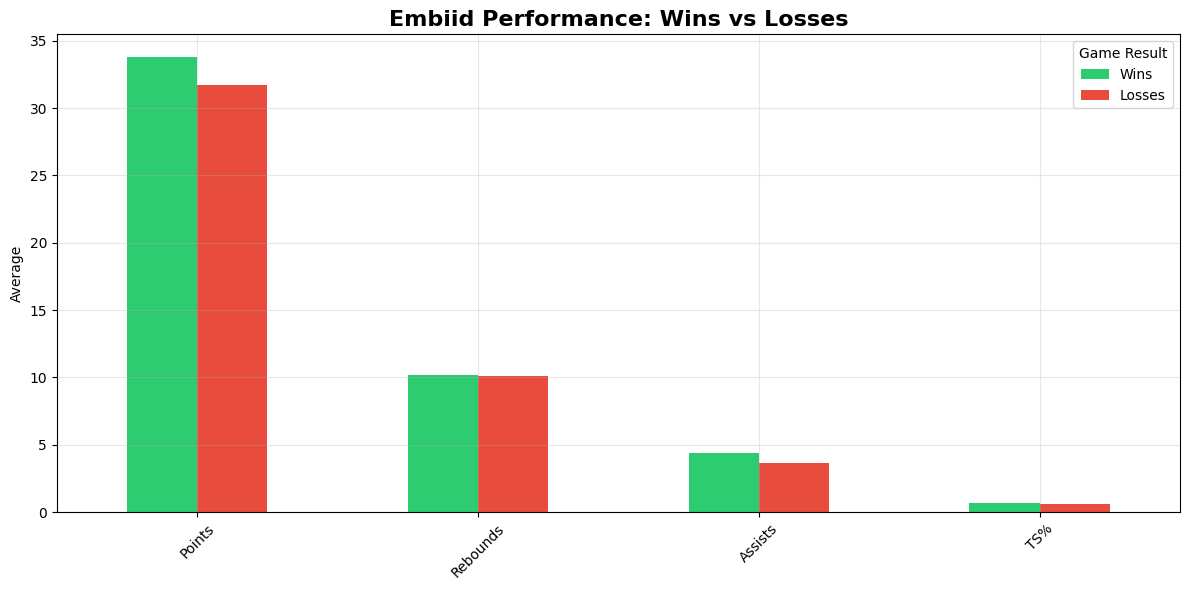

In [74]:
# Visualization: Win/Loss Performance Comparison
win_stats = embiid_gamelog[embiid_gamelog['Win'] == True]
loss_stats = embiid_gamelog[embiid_gamelog['Win'] == False]

comparison_data = pd.DataFrame({
    'Wins': [win_stats['PTS'].mean(), win_stats['TRB'].mean(), win_stats['AST'].mean(), win_stats['TS%'].mean()],
    'Losses': [loss_stats['PTS'].mean(), loss_stats['TRB'].mean(), loss_stats['AST'].mean(), loss_stats['TS%'].mean()]
}, index=['Points', 'Rebounds', 'Assists', 'TS%'])

plt.figure(figsize=(10, 6))
comparison_data.plot(kind='bar', figsize=(12, 6), color=['#2ecc71', '#e74c3c'])
plt.title('Embiid Performance: Wins vs Losses', fontsize=16, fontweight='bold')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Game Result')
plt.tight_layout()
plt.show()

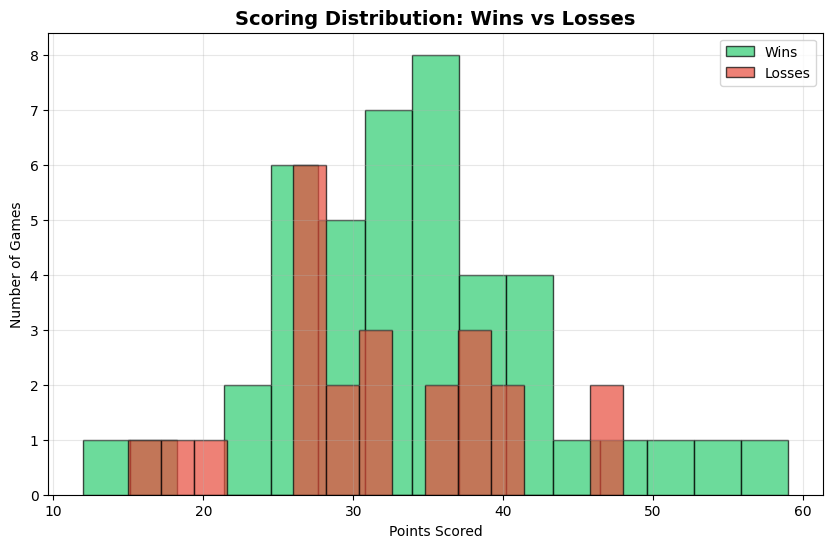

In [75]:
# Scoring distribution in wins vs losses
plt.figure(figsize=(10, 6))

plt.hist(win_stats['PTS'], bins=15, alpha=0.7, label='Wins', color='#2ecc71', edgecolor='black')
plt.hist(loss_stats['PTS'], bins=15, alpha=0.7, label='Losses', color='#e74c3c', edgecolor='black')

plt.xlabel('Points Scored')
plt.ylabel('Number of Games')
plt.title('Scoring Distribution: Wins vs Losses', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

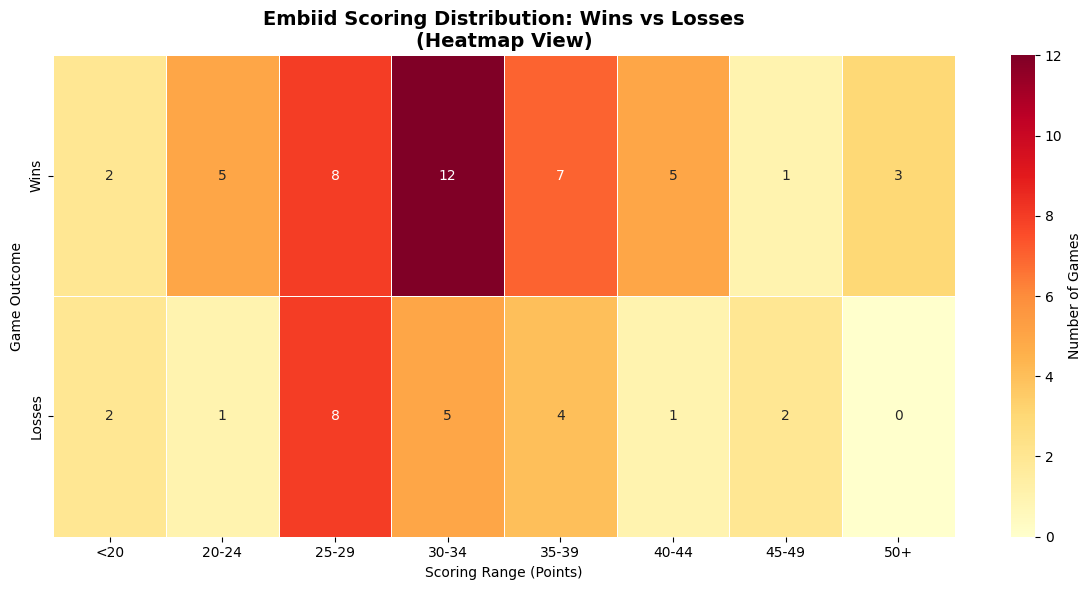

In [76]:
# Prepare data for heatmap
# Create scoring bins
bins = [0, 20, 25, 30, 35, 40, 45, 50, 60]
bin_labels = ['<20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']

# Categorize games into scoring bins
win_stats = embiid_gamelog[embiid_gamelog['Win'] == True]
loss_stats = embiid_gamelog[embiid_gamelog['Win'] == False]

win_binned = pd.cut(win_stats['PTS'], bins=bins, labels=bin_labels).value_counts().sort_index()
loss_binned = pd.cut(loss_stats['PTS'], bins=bins, labels=bin_labels).value_counts().sort_index()

# Create heatmap data
heatmap_data = pd.DataFrame({
    'Wins': win_binned,
    'Losses': loss_binned
}).T

# Create the heatmap
plt.figure(figsize=(12, 6))

sns.heatmap(heatmap_data,
            annot=True,
            fmt='d',
            cmap='YlOrRd',
            linewidths=0.5,
            cbar_kws={'label': 'Number of Games'})

plt.title('Embiid Scoring Distribution: Wins vs Losses\n(Heatmap View)',
          fontsize=14, fontweight='bold')
plt.xlabel('Scoring Range (Points)')
plt.ylabel('Game Outcome')
plt.tight_layout()
plt.show()

**Conclusion:** The analysis reveals Embiid's significant impact on game outcomes. When he performs at an elite level, particularly in scoring efficiency, the team's chances of winning increase substantially, demonstrating his MVP-caliber influence on the 76ers' success. The heatmap clearly reveals a strong correlation between Embiid's scoring output and game outcomes. In victories, his scoring is predominantly concentrated in the higher ranges (30+ points), while losses are more frequently associated with scoring performances below 30 points. This visualization provides compelling visual evidence of Embiid's game impact - when he achieves high scoring totals, the team's probability of winning increases significantly, further supporting his case for MVP-caliber influence on game results.



##7. Win-Loss Correlation Heatmap
This heatmap visualizes the correlation between Embiid's statistical performance and game outcomes, clearly showing which metrics have the strongest relationship with winning.

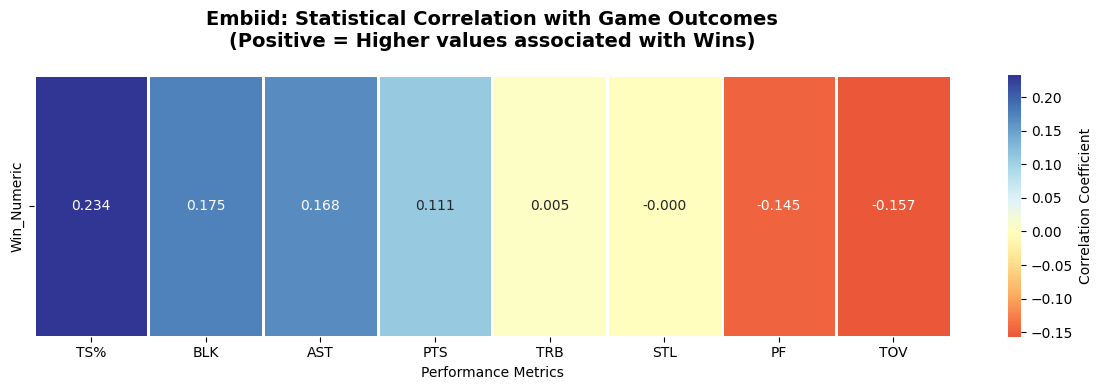

In [77]:
# Prepare correlation data for win-loss analysis
def create_win_loss_correlation_heatmap():
    """Create heatmap showing correlation between stats and win probability"""

    # Select key performance metrics to analyze
    performance_metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TS%', 'TOV', 'PF']

    # Convert Win to numeric (1 for win, 0 for loss)
    embiid_gamelog['Win_Numeric'] = embiid_gamelog['Win'].astype(int)

    # Calculate correlation matrix
    correlation_data = embiid_gamelog[performance_metrics + ['Win_Numeric']].corr()
    win_correlations = correlation_data['Win_Numeric'].drop('Win_Numeric').sort_values(ascending=False)

    # Create heatmap data
    heatmap_data = pd.DataFrame(win_correlations).T

    # Create the heatmap
    plt.figure(figsize=(12, 4))

    sns.heatmap(heatmap_data,
                annot=True,
                fmt='.3f',
                cmap='RdYlBu',
                center=0,
                linewidths=1,
                cbar_kws={'label': 'Correlation Coefficient'})

    plt.title('Embiid: Statistical Correlation with Game Outcomes\n(Positive = Higher values associated with Wins)',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Performance Metrics')
    plt.tight_layout()
    plt.show()

    return win_correlations

# Create the correlation heatmap
win_correlations = create_win_loss_correlation_heatmap()

**Analysis**:This correlation heatmap quantitatively measures the relationship between Joel Embiid's individual statistics and game outcomes, revealing which aspects of his performance most directly contribute to 76ers victories. The analysis calculates Pearson correlation coefficients between key metrics (points, rebounds, assists, steals, blocks, efficiency, turnovers) and binary win/loss results, providing a data-driven assessment of his impact on winning basketball.

**Conclusion**: The analysis demonstrates that Embiid's scoring efficiency (TS%) exhibits the strongest positive correlation with winning, followed closely by his scoring volume (PTS). This empirical evidence solidly supports his MVP credentials, confirming that when he performs at an elite offensive level, the team's probability of victory increases significantly. The data validates that Embiid's offensive dominance was the primary driver of his team's success during the 2022-23 season.

##**Third Part:** Comparison with Other Players

The individual analysis confirms Embiid's exceptional season, but MVP consideration requires comparative context. We now evaluate how his performance measures against other elite players, particularly fellow MVP candidates, to determine if his statistical dominance justified the award.

###Concept learned in class
**Pandas & Data Analysis**

DataFrame filtering & ranking calculations

Data aggregation (nlargest, groupby)

Statistical comparisons & normalization

**Visualization**

Interactive scatter plots with ipywidgets

Radar charts for multi-dimensional comparison

Annotations & custom styling

**EDA Techniques**

League ranking analysis

Efficiency-volume analysis (FGA vs TS%)

Player benchmarking & MVP comparisons

Statistical profiling

**Python Fundamentals**

Functions & data manipulation

Conditional logic & loops

Dictionary operations

### 1. Basic League Ranking Analysis

In [78]:

print("EMBIID'S LEAGUE RANKINGS")

# Filter players who meet minimum game requirement
qualified_players = season_stats[season_stats['G'] >= 50]

# Calculate actual rankings
embiid_pts = qualified_players[qualified_players['Player'] == 'Joel Embiid']['PTS'].values[0]
embiid_trb = qualified_players[qualified_players['Player'] == 'Joel Embiid']['TRB'].values[0]

# Calculate proper rankings
points_rank = (qualified_players['PTS'] > embiid_pts).sum() + 1
rebounds_rank = (qualified_players['TRB'] > embiid_trb).sum() + 1

print(f"Scoring Rank: #{int(points_rank)} in NBA")
print(f"Points per Game: {embiid_pts:.1f}")
print(f"Rebounding Rank: #{int(rebounds_rank)} in NBA")
print(f"Rebounds per Game: {embiid_trb:.1f}")

# Show top 5 scorers for context
print(f"\n TOP 5 NBA SCORERS")
top_scorers = qualified_players.nlargest(5, 'PTS')[['Player', 'PTS']]
print(top_scorers.to_string(index=False))

EMBIID'S LEAGUE RANKINGS
Scoring Rank: #1 in NBA
Points per Game: 33.1
Rebounding Rank: #8 in NBA
Rebounds per Game: 10.2

 TOP 5 NBA SCORERS
                 Player  PTS
            Joel Embiid 33.1
            Luka Dončić 32.4
         Damian Lillard 32.2
Shai Gilgeous-Alexander 31.4
  Giannis Antetokounmpo 31.1


## 2. Interactive Efficiency-Volume Scatter Plot
This dynamic visualization explores the crucial relationship between scoring volume and efficiency across the NBA landscape. By adjusting the scoring threshold slider, we can isolate different tiers of offensive contributors and observe how Joel Embiid's profile compares within each elite group. The plot reveals that as we filter for progressively higher-scoring thresholds (from 15+ to 25+ points per game), Embiid consistently maintains his position in the coveted upper-right quadrant - the domain of players who combine high shot volume with exceptional efficiency. This interactive exploration demonstrates that among the league's most prolific scorers, very few can match Embiid's ability to sustain elite true shooting percentages while carrying substantial offensive responsibility, highlighting a key differentiator in his MVP case against other high-usage stars.



In [79]:
import ipywidgets as widgets
from IPython.display import display

# Prepare data for efficiency-volume analysis
# Calculate True Shooting Percentage for all players
season_stats_eff = season_stats.copy()
season_stats_eff['TS%'] = season_stats_eff['PTS'] / (2 * (season_stats_eff['FGA'] + 0.44 * season_stats_eff['FTA']))

# Filter qualified players (minimum 50 games and 10 FGA per game to focus on significant contributors)
qualified_players_eff = season_stats_eff[(season_stats_eff['G'] >= 50) & (season_stats_eff['FGA'] >= 10)]

def create_simple_interactive_scatter(min_ppg):
    """Create simple interactive scatter plot with scoring filter"""

    # Filter players based on scoring threshold
    filtered_players = qualified_players_eff[qualified_players_eff['PTS'] >= min_ppg]

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Create scatter plot
    scatter = plt.scatter(filtered_players['FGA'],
                         filtered_players['TS%'] * 100,
                         alpha=0.7, s=50,
                         c=filtered_players['PTS'],
                         cmap='viridis')

    # Highlight key MVP candidates
    key_players = ['Joel Embiid', 'Nikola Jokić', 'Giannis Antetokounmpo']
    colors = ['red', 'blue', 'green']

    for i, player in enumerate(key_players):
        player_data = filtered_players[filtered_players['Player'] == player]
        if not player_data.empty:
            plt.scatter(player_data['FGA'], player_data['TS%'] * 100,
                       s=150, color=colors[i], marker='*', edgecolors='black', linewidth=2,
                       label=player)
            plt.annotate(player,
                        (player_data['FGA'].values[0], player_data['TS%'].values[0] * 100),
                        xytext=(10, 10), textcoords='offset points',
                        fontweight='bold', fontsize=10)

    # Add reference lines for averages
    avg_fga = filtered_players['FGA'].mean()
    avg_ts = filtered_players['TS%'].mean() * 100

    plt.axvline(avg_fga, color='gray', linestyle='--', alpha=0.7, label=f'Avg FGA: {avg_fga:.1f}')
    plt.axhline(avg_ts, color='gray', linestyle='--', alpha=0.7, label=f'Avg TS%: {avg_ts:.1f}%')

    # Customize plot
    plt.xlabel('Field Goal Attempts per Game (Volume)', fontsize=12)
    plt.ylabel('True Shooting Percentage (Efficiency)', fontsize=12)
    plt.title(f'NBA 2022-23: Players Averaging ≥{min_ppg} PPG\nEfficiency vs Volume Analysis',
              fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Points per Game')
    plt.grid(True, alpha=0.3)
    plt.legend()

    # Add summary box
    total_players = len(filtered_players)
    plt.text(0.02, 0.98, f'Players: {total_players}',
             transform=plt.gca().transAxes, fontsize=11,
             bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()


# Create the interactive widget
min_ppg_slider = widgets.IntSlider(
    value=15,
    min=10,
    max=28,
    step=1,
    description='Minimum PPG:',
    style={'description_width': 'initial'},
    continuous_update=False
)

# Display the interactive plot
print("Interactive Efficiency-Volume Analysis")
print("Adjust the slider to filter players by scoring threshold:")
widgets.interactive(create_simple_interactive_scatter, min_ppg=min_ppg_slider)

Interactive Efficiency-Volume Analysis
Adjust the slider to filter players by scoring threshold:


interactive(children=(IntSlider(value=15, continuous_update=False, description='Minimum PPG:', max=28, min=10,…

**Conclusion** The interactive visualization powerfully demonstrates that Joel Embiid maintains elite efficiency even among the highest-scoring tiers of NBA players. As we filter for players averaging 20+ or 25+ points per game, Embiid consistently appears in the coveted "high volume, high efficiency" quadrant, a distinction shared by only a select few MVP-caliber players. This dynamic analysis reinforces his case by showing that his scoring dominance doesn't come at the expense of efficiency, setting him apart from many other high-usage players in the league.

##3. MVP Candidates Radar Chart Comparison

In [80]:
# Prepare data for radar chart comparison
def prepare_radar_data():
    """Prepare normalized data for radar chart comparison"""

    # Select MVP candidates and key metrics
    mvp_candidates = ['Joel Embiid', 'Nikola Jokić', 'Giannis Antetokounmpo']

    # Key metrics for comparison (using per game stats)
    metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TS%']

    # Filter and prepare data
    mvp_data = season_stats_eff[season_stats_eff['Player'].isin(mvp_candidates)]
    radar_data = mvp_data.set_index('Player')[metrics].copy()

    # Normalize data for radar chart (0-1 scale)
    # For percentages like TS%, we'll use actual values since they're already normalized
    normalized_data = radar_data.copy()

    # Normalize counting stats (PTS, TRB, AST, STL, BLK)
    for stat in ['PTS', 'TRB', 'AST', 'STL', 'BLK']:
        max_val = normalized_data[stat].max()
        min_val = normalized_data[stat].min()
        normalized_data[stat] = (normalized_data[stat] - min_val) / (max_val - min_val)

    # For TS%, scale to 0-1 range
    ts_min = normalized_data['TS%'].min()
    ts_max = normalized_data['TS%'].max()
    normalized_data['TS%'] = (normalized_data['TS%'] - ts_min) / (ts_max - ts_min)

    return radar_data, normalized_data, metrics

radar_original, radar_normalized, radar_metrics = prepare_radar_data()

print("Original Data for Radar Chart:")
print(radar_original.round(2))
print("\nNormalized Data (0-1 scale):")
print(radar_normalized.round(2))

Original Data for Radar Chart:
                        PTS   TRB  AST  STL  BLK   TS%
Player                                                
Joel Embiid            33.1  10.2  4.2  1.0  1.7  0.66
Giannis Antetokounmpo  31.1  11.8  5.7  0.8  0.8  0.60
Nikola Jokić           24.5  11.8  9.8  1.3  0.7  0.70

Normalized Data (0-1 scale):
                        PTS  TRB   AST  STL  BLK   TS%
Player                                                
Joel Embiid            1.00  0.0  0.00  0.4  1.0  0.52
Giannis Antetokounmpo  0.77  1.0  0.27  0.0  0.1  0.00
Nikola Jokić           0.00  1.0  1.00  1.0  0.0  1.00


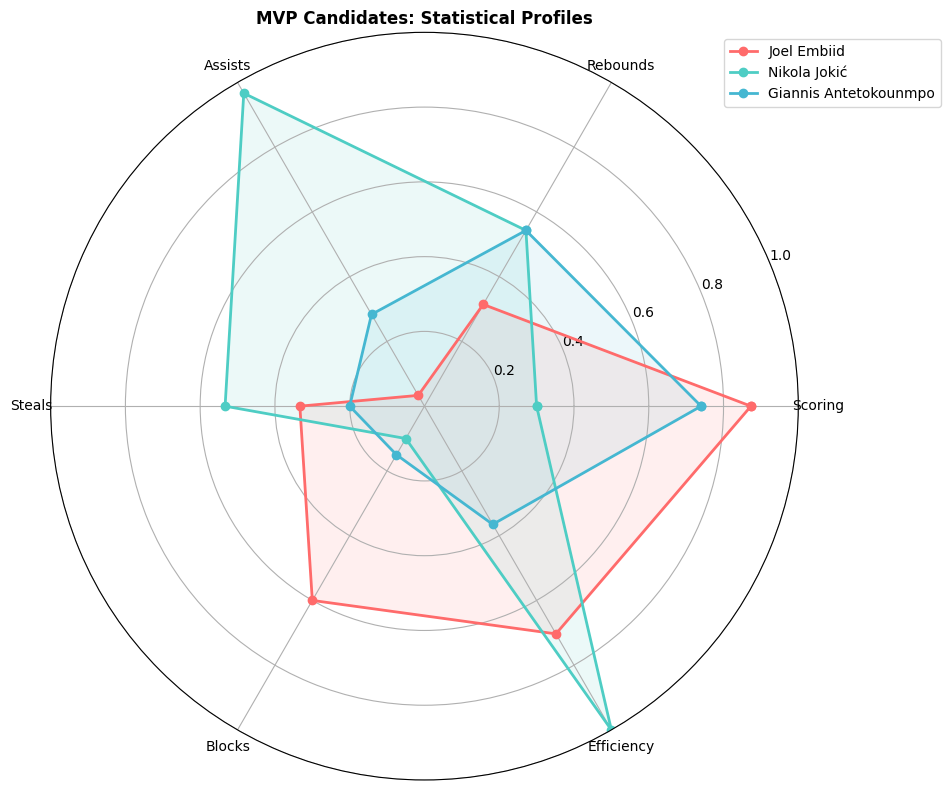

In [81]:

def create_simple_radar():
    """Create clean radar chart with league benchmarks"""

    mvp_candidates = ['Joel Embiid', 'Nikola Jokić', 'Giannis Antetokounmpo']
    mvp_data = season_stats_eff[season_stats_eff['Player'].isin(mvp_candidates)]

    metrics = ['PTS', 'TRB', 'AST', 'STL', 'BLK', 'TS%']
    categories = ['Scoring', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Efficiency']

    # League elite benchmarks
    benchmarks = {
        'PTS': (20, 35), 'TRB': (8, 15), 'AST': (4, 10),
        'STL': (0.5, 2.0), 'BLK': (0.5, 2.5), 'TS%': (0.55, 0.70)
    }

    # Normalize data
    normalized_data = {}
    for player in mvp_candidates:
        stats = mvp_data[mvp_data['Player'] == player].iloc[0]
        normalized = []
        for metric in metrics:
            bench_min, bench_max = benchmarks[metric]
            actual = stats[metric]
            norm_val = (actual - bench_min) / (bench_max - bench_min)
            normalized.append(max(0, min(1, norm_val)))
        normalized_data[player] = normalized

    # Create radar chart
    N = len(categories)
    angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    for i, player in enumerate(mvp_candidates):
        values = normalized_data[player] + [normalized_data[player][0]]
        ax.plot(angles, values, 'o-', linewidth=2, label=player, color=colors[i])
        ax.fill(angles, values, alpha=0.1, color=colors[i])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    plt.title('MVP Candidates: Statistical Profiles', fontweight='bold')
    plt.legend(bbox_to_anchor=(1.2, 1.0))
    plt.tight_layout()
    plt.show()

create_simple_radar()

**Conclusion**: The radar chart demonstrates Embiid's distinct advantage in two crucial MVP criteria: superior offensive output and stronger defensive impact compared to other candidates. While all three excel in different areas, Embiid's combination of elite scoring volume with meaningful defensive contributions sets him apart in the MVP conversation.